# Project of Foundations of Computer Science 

# Autore: Vincenzi Alessandro (matricola 800608)

Il lavoro seguente mira ad esplorare 7 dataset contenuti nel database 'Additional kiva snapshot' e a soddisfare svariate query interamente in linguaggio python, all'interno dell'ambiente JupyterLab.

Il database puoi trovarlo [qui](https://www.kaggle.com/gaborfodor/additional-kiva-snapshot)  

Le tabelle relazionali (lenders.csv, loans.csv, loans_lenders.csv, country_stats.csv, GEconV4.csv, locations.csv, loan_coords.csv) non saranno tutte oggetto d'esame; esse offrono informazioni riguardo oltre 1.4 milioni di prestiti e quasi 1.4 milioni di finanziatori, provenienti da 91 diversi Stati. Così come suggerisce l'iterfaccia del software JupyterLab, il progetto si avvale di singole celle usate per implementare algoritmi che forniscono informazioni mirate o generali mediante singoli dati, dataframe oppure rappresentazioni grafiche.


Il primo passo è quello di importare tutte le librerie necessarie, in quanto contenenti funzioni utili ad adempiere a determinate operazioni. Ad alcune di esse verranno assegnati dei diminutivi per agevolare e velocizzare il processo risolutivo.

In [1]:
import pandas as pd
import numpy as np 
import autotime
import seaborn as sea
import matplotlib.pyplot as plt
import time
%load_ext autotime

In seconda battuta si caricano i dataset che verranno presi in esame: 'country_stats', 'loans_lenders' e 'loans'. 
La lettura della porzione iniziale di ogni tabella è utile per conoscere il contenuto di ciascuna variabile e per individuare quelle colonne chiave che servono a fondere più dataset. 

In [2]:
country=pd.read_csv('country_stats.csv')  
country.head(3)

,country_name,country_code,country_code3,continent,region,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni,kiva_country_name
0,India,IN,IND,Asia,Southern Asia,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799,India
1,Nigeria,NG,NGA,Africa,Western Africa,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264,Nigeria
2,Mexico,MX,MEX,Americas,Central America,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680,Mexico


time: 75 ms


In [4]:
lender=pd.read_csv("loans_lenders.csv")   #1387432 righe
lender.head(3)

,loan_id,lenders
0,483693,"muc888, sam4326, camaran3922, lachheb1865, reb..."
1,483738,"muc888, nora3555, williammanashi, barbara5610,..."
2,485000,"muc888, terrystl, richardandsusan8352, sherri4..."


time: 10.6 s


In [5]:
loans=pd.read_csv("loans.csv")
loans.head(3)

,loan_id,loan_name,original_language,description,description_translated,funded_amount,loan_amount,status,activity_name,sector_name,...,raised_time,lender_term,num_lenders_total,num_journal_entries,num_bulk_entries,tags,borrower_genders,borrower_pictured,repayment_interval,distribution_model
0,657307,Aivy,English,"Aivy, 21 years of age, is single and lives in ...",NaN,125.0,125.0,funded,General Store,Retail,...,2014-01-15 04:48:22.000 +0000,7.0,3,2,1,NaN,female,true,irregular,field_partner
1,657259,Idalia Marizza,Spanish,"Doña Idalia, esta casada, tiene 57 años de eda...","Idalia, 57, is married and lives with her husb...",400.0,400.0,funded,Used Clothing,Clothing,...,2014-02-25 06:42:06.000 +0000,8.0,11,2,1,NaN,female,true,monthly,field_partner
2,658010,Aasia,English,Aasia is a 45-year-old married lady and she ha...,NaN,400.0,400.0,funded,General Store,Retail,...,2014-01-24 23:06:18.000 +0000,14.0,16,2,1,"#Woman Owned Biz, #Supporting Family, user_fav...",female,true,monthly,field_partner


time: 1min 22s


In [6]:
loans.columns # Nomi delle colonne del dataset 'loans', che ne presenta in maggior numero

Index(['loan_id', 'loan_name', 'original_language', 'description',
       'description_translated', 'funded_amount', 'loan_amount', 'status',
       'activity_name', 'sector_name', 'loan_use', 'country_code',
       'country_name', 'town_name', 'currency_policy',
       'currency_exchange_coverage_rate', 'currency', 'partner_id',
       'posted_time', 'planned_expiration_time', 'disburse_time',
       'raised_time', 'lender_term', 'num_lenders_total',
       'num_journal_entries', 'num_bulk_entries', 'tags', 'borrower_genders',
       'borrower_pictured', 'repayment_interval', 'distribution_model'],
      dtype='object')

time: 11.4 ms


In [7]:
loans.isna().any()    # Si elencano quali colonne posseggono na

loan_id                            False
loan_name                           True
original_language                   True
description                         True
description_translated              True
funded_amount                      False
loan_amount                        False
status                             False
activity_name                      False
sector_name                        False
loan_use                            True
country_code                        True
country_name                       False
town_name                           True
currency_policy                    False
currency_exchange_coverage_rate     True
currency                           False
partner_id                          True
posted_time                        False
planned_expiration_time             True
disburse_time                       True
raised_time                         True
lender_term                         True
num_lenders_total                  False
num_journal_entr

time: 4.06 s


***

# 1) Normalize the loan_lenders table. In the normalized table, each row must have one loan_id and one lender.

Per normalizzare la tabella si è pensato di leggere ogni riga della tabella 'lender' come una tupla, grazie alla funzione zip(). Dopodichè ogni cella della colonna 'lenders' si suddivide in tanti elementi quanti sono i prestatori. Poi si aggiunge alla lista 'primo' i codici identificativi dei prestiti ('loan_id') e alla lista 'secondo' i nomi dei prestatori ('lenders'). Infine nel dataframe 'df' si tramutano le due liste nelle sue due colonne, ottenendo per ogni riga un loan_id e un lender

In [10]:
primo=[]
secondo=[]
for prest,loan in zip(lender['lenders'],lender['loan_id']): 
#considero le colonne del dataset 'lender' contenenti i nomi dei prestatori e il codice identificativo del prestito
    for el in prest.split(', '):                            
#ogni cella della colonna 'lenders' viene divisa per ', ' per ottenere un'insieme ben definito di prestatori
        primo.append(loan)                                  
#si memorizza nelle liste ogni lenders insieme al loan_id associato
        secondo.append(el)
df = pd.DataFrame({'loan_id': primo, 'lenders': secondo})   
#per poi trasferire le liste nel dataframe df, in questo modo normalizzato
df.head() 

,loan_id,lenders
0,483693,muc888
1,483693,sam4326
2,483693,camaran3922
3,483693,lachheb1865
4,483693,rebecca3499


time: 1min 6s


***

# 2) For each loan, add a column duration corresponding to the number of days between the disburse time and the planned expiration time. If any of those two dates is missing, also the duration must be missing.

Si genera la colonna 'duration' formata come segue: si covertono i valori delle colonne 'planned_expiration_time' e 'disburse_time' in oggetti date time, in modo da calcolarne la differenza per poi trasformare il valore ottenuto in secondi. Infine si sottraggono le due date e si divide questo risultato per (60 * 60 * 24)=86400, allo scopo di passare dalla durata in secondi a quella in giorni. 

In [12]:
loans['duration']=((pd.to_datetime(loans['planned_expiration_time'])-pd.to_datetime(loans['disburse_time'])).dt.total_seconds())/86400
pd.DataFrame({'loan_name':loans['loan_name'],'country_code':loans['country_code'],'disburse_time':loans['disburse_time'],'planned_expiration_time':loans['planned_expiration_time'],'duration':round(loans['duration'],2)}).head()

,loan_name,country_code,disburse_time,planned_expiration_time,duration
0,Aivy,PH,2013-12-22 08:00:00.000 +0000,2014-02-14 03:30:06.000 +0000,53.81
1,Idalia Marizza,HN,2013-12-20 08:00:00.000 +0000,2014-03-26 22:25:07.000 +0000,96.60
2,Aasia,PK,2014-01-09 08:00:00.000 +0000,2014-02-15 21:10:05.000 +0000,37.55
3,Gulmira,KG,2014-01-17 08:00:00.000 +0000,2014-02-21 03:10:02.000 +0000,34.80
4,Ricky\t,PH,2013-12-17 08:00:00.000 +0000,2014-02-13 06:10:02.000 +0000,57.92


time: 12.2 s


In [14]:
len(loans[loans['duration']<0])   
# Nel caso ci chiedessimo se fossero presenti 'duration' negative, la risposta sarebbe affermativa.

14935

time: 102 ms


Si nota che 14934 righe su 1419607 (1%) hanno differenza negativa, ciò sta a significare che 'disburse_time' e 'planned_expiration_time' sono stati invertiti(errore di compilazione) oppure indica quanti giorni sono trascorsi dopo il giorno di scadenza fissato per prestare l'ammontare di denaro. 

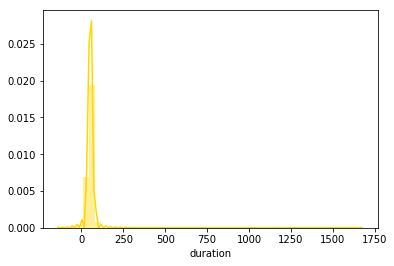

time: 3.87 s


In [15]:
sea.distplot(loans['duration'][loans['duration'].isna()==False],color='gold')

L'istogramma ha il compito di evidenziare la distribuzione di 'duration', dalla quale si rileva la massima concentrazione nell'intervallo (40,60). La durata, che intercorre tra il momento del prestito e la sua scadenza, più frequentemente trascorsa è uguale a 60 giorni. 
Però si presentano anche prestiti finanziati avvenuti fino a quattro anni e mezzo (1670 giorni) prima della scadenza e di altri verificatisi fino a 140 giorni dopo la scadenza.

In [16]:
w=round(loans['duration'][loans['duration'].isna()==False],-1) 
# Si arrotondano i valori di durata al primo valore prima della virgola. La particolarità della funzione round() è che arrotonda per eccesso al di sopra della metà della cifra successiva e per difetto al di sotto di essa. 
w.groupby(w).count()                                           
# Si conta la numerosità dei singoli valori arrotondati.

duration
-140.0          1
-90.0           3
-80.0          18
-70.0           6
-60.0         573
-50.0        1507
-40.0        1212
-30.0        2036
-20.0        3099
-10.0        3654
 0.0         7102
 10.0        6178
 20.0        8938
 30.0       46902
 40.0      247969
 50.0      253816
 60.0      299647
 70.0      119007
 80.0       24930
 90.0       15001
 100.0       2557
 110.0        409
 120.0         70
 130.0          7
 1350.0         6
 1360.0        18
 1370.0        39
 1380.0         6
 1390.0         7
 1400.0         6
 1410.0         7
 1430.0        17
 1440.0         8
 1450.0         7
 1460.0        50
 1470.0        42
 1480.0        18
 1490.0         5
 1500.0         8
 1510.0        14
 1520.0         1
 1530.0         8
 1550.0         8
 1560.0        17
 1570.0         1
 1580.0         5
 1640.0         1
 1650.0        11
 1660.0         3
 1670.0         7
Name: duration, dtype: int64

time: 138 ms


***

# 3) Find the lenders that have funded at least twice.

A partire dal dataframe 'df' si conta il numero dei finanziamenti per ogni prestatore, poi si pone un vincolo per considerare solo le quantità maggiori di uno.
Il numero totale di investitori che hanno prestato almeno due volte una qualsiasi quantità di denaro risultano essere 901811. Il contribuente più partecipativo è stato 'gooddogg1', comparso 177645 volte. Si mostrano in tabella i (primi) 10 lenders che hanno versato il maggior numero di prestiti e di seguito l'istogramma che mette in risalto la grande variazione che sussiste tra di essi. Nel momento in cui gli indici si sono rispristinati con la funzione reset_index() i nomi delle colonne sono stati sostituiti, ragion per cui si ha applicato la funzione rename() per rinominare tali colonne. Fondamentalmente 'lenders' è diventata 'Funded_times' e 'index' si è trasformata in 'Lenders'.

In [20]:
double_loans=pd.DataFrame(df['lenders'].value_counts()[df['lenders'].value_counts()>1]).reset_index().rename(columns={'lenders':'Funded_times','index':'Lenders'})
double_loans.head(10)

,Lenders,Funded_times
0,gooddogg1,177645
1,trolltech4460,150762
2,gmct,128159
3,nms,104314
4,themissionbeltco,81434
5,jouko1940,52906
6,rjhoward1986,50107
7,barbara5610,48925
8,shirley1905,40371
9,joinFITE,39463


time: 41.2 s


Text(0.5, 1.0, 'The 10 lenders who financed more times than any other')

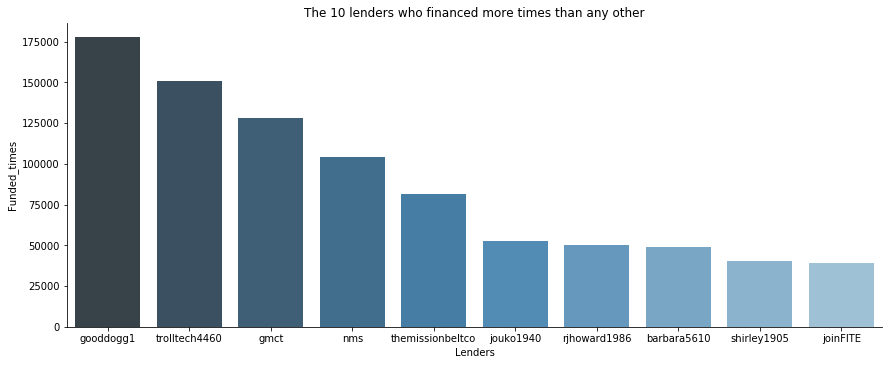

time: 598 ms


In [21]:
sea.catplot('Lenders','Funded_times', data=double_loans.head(10),kind="bar",aspect=2.5,palette='Blues_d')
plt.title('The 10 lenders who financed more times than any other')

***

# 4) For each country, compute how many loans have involved that country as borrowers.

Si elencano gli elementi unici della variabile 'country_code' appartenente al dataset 'loans', accorgendosi della presenza di elementi sospetti come 'nan' e di alcuni prefissi internazionali dalla dubbia provenienza. 

In [22]:
loans['country_code'].unique()      

array(['PH', 'HN', 'PK', 'KG', 'SV', 'BI', 'ML', 'MN', 'PE', 'GE', 'AM',
       'GH', 'TZ', 'KH', 'TG', 'GT', 'LB', 'PY', 'NI', 'KE', 'UG', 'RW',
       'MZ', 'AZ', 'IL', 'TJ', 'BO', 'MX', 'ID', 'NG', 'EC', 'MG', 'VN',
       'CO', 'JO', 'YE', 'IN', 'CL', 'AL', 'PS', 'NP', 'SL', 'US', 'CD',
       'CM', 'WS', 'DO', 'BJ', 'LR', 'SN', 'LA', 'MM', 'IQ', 'ZW', 'TH',
       'BF', 'TL', 'HT', 'UA', 'CG', 'XK', 'AF', 'ZA', 'SS', 'CR', 'TR',
       'EG', 'ZM', 'BZ', 'MW', 'SR', 'SO', 'SB', 'MD', 'CN', 'BR', 'LS',
       'BA', 'CI', 'LK', 'PA', 'PR', 'BG', nan, 'GZ', 'TD', 'VC', 'VI',
       'VU', 'GU', 'PG', 'CA', 'BW', 'BT', 'MR', 'UY'], dtype=object)

time: 239 ms


In [23]:
loans[['country_code','country_name']][loans['country_code'].isnull()]   
# I missing values di 'country_code' appartengono alla Namibia

,country_code,country_name
82889,NaN,Namibia
156970,NaN,Namibia
598087,NaN,Namibia
684876,NaN,Namibia
971827,NaN,Namibia
1134818,NaN,Namibia
1214923,NaN,Namibia
1281022,NaN,Namibia
1415763,NaN,Namibia


time: 172 ms


Sono presenti 9 'NaN'(missing values). Tutti si riferiscono alla Namibia (NM), perciò devono essere sostituiti con il country_code 'NM'.

In [24]:
lista=[]
for i,p in zip(loans['country_code'].unique(),loans['country_name'].unique()):  
# Si considerano gli Stati e i loro prefissi internazionali, presenti in 'loans'
    if i not in country['country_code'].unique():                   
# Si valuta quali dei prefissi precedenti non sono contenuti in 'country_code' del dataset country
        lista.append([i] + [p])

time: 329 ms


Confrontando il dataset 'country' (contenente tutti i possibili stati del mondo) con 'loans' (contenente gli stati da cui sono partiti i prestiti) si evidenziano 
5 country che non sono realmente riconosciuti come paesi e che quindi posso eliminare da 'country_code'. 
Insorgono 34 valori appartenenti alle seguenti regioni:

[['GZ', 'Gaza'], ['VC', 'Saint Vincent and the Grenadines'], ['VI', 'Virgin Islands'], ['VU', 'Vanuatu'], ['GU', 'Guam']] 



In [26]:
loans['country_code']=loans['country_code'].fillna('NM')        
# Si sostituiscono i missing values associati alla Namibia, della colonna 'country_code', con 'NM'. 
for i in ['GZ','VC','VI','VU','GU']:
    loans=loans.drop(loans.loc[loans['country_code']==i].index) 
# Si eliminano tutte qulle righe che possiedono i country_code trovati nella previa cella.

time: 10.4 s


Vengono eliminati i 34 valori precedentemente identificati, di cui:
- 16 'Saint Vincent and the Grenadines' (VC),
- 8 'Gaza' (GZ), 
- 4 'Guam' (GU),
- 4 'Vanuatu' (VU),
- 2 'Virgin Island' (VI).

Le righe del dataset passano da 1419607 a 1419573 

Il risultato finale atteso consiste in una tabella ove, per ognuno dei 91 Stati, si abbia il numero di volte che hanno preso un prestito. Ulteriormente si modifica l'ordine delle righe per presentare i primi 10 paesi della classifica. Il metodo utilizzato per raggiungere tale risultato è il raggruppamento, per mezzo della funzione groupby(), della variabile 'country_code' che conta quanti finanziamenti sono stati ricevuti ('borrow_times'). 
Dopodichè si traccia il grafico a barre che raffigura i dati della tabella 'punto4', disposti in ordine decrescente per 'borrow_times' 

In [27]:
punto4=pd.DataFrame(loans['loan_id'].groupby(loans['country_code']).count()).reset_index().rename(columns={'loan_id':'borrow_times'})
punto4.sort_values('borrow_times',ascending=0).head(10)             
#vengono identificati i paesi mutuatari per numerosità di prestiti incassati 

,country_code,borrow_times
60,PH,285336
36,KE,143699
58,PE,86000
38,KH,79701
72,SV,64037
81,UG,45882
61,PK,45120
76,TJ,43942
54,NI,42519
21,CO,33675


time: 699 ms


La tabella individua le Filippine ('PH') come lo Stato che ha ricevuto più prestiti, in particolare 285336 volte. Invece il grafico svela l'enorme differenza che risiede tra le Filippine e le altre nazioni che seguono in graduatoria.

Text(0.5, 1.0, 'The 10 countries who received more loans than any other')

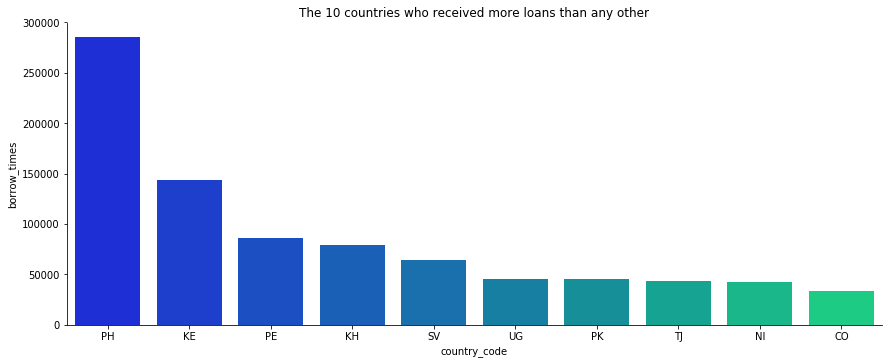

time: 768 ms


In [28]:
sea.catplot('country_code','borrow_times', data=punto4.sort_values('borrow_times',ascending=0).head(10),kind="bar",aspect=2.5,palette='winter')
plt.title('The 10 countries who received more loans than any other')

***

# 5) For each country, compute the overall amount of money borrowed.

Rispetto al caso precedente, la principale differenza a livello risolutivo risiede nel fatto che la funzione groupby() abbia sommato l'ammontare di denaro, invece di contarlo. Vengono mostrati i primi 10 paesi che hanno preso in prestito la maggior quantità di denaro. 

In [29]:
punto5=pd.DataFrame(loans['funded_amount'].groupby(loans['country_code']).sum().sort_values(ascending=False)).reset_index().rename(columns={'funded_amount':'Overall_amount_borrowed'}) 
punto5.head(10)

,country_code,Overall_amount_borrowed
0,PH,97045925.0
1,PE,78702800.0
2,KE,63650255.0
3,PY,53715200.0
4,KH,50829425.0
5,BO,41814950.0
6,SV,37881675.0
7,TJ,37049825.0
8,UG,36914450.0
9,US,36365340.0


time: 179 ms


Il divario presente nel bar chart, tra i principali paesi, è meno marcato rispetto ai grafici precedenti sebbene sia lampante che le Filippine, al vertice per mole di prestiti ricevuti, abbiano riscosso una quantità di denaro doppia se paragonata a qulla della Bolivia (BO) che si colloca in quinta posizione.

Text(0.5, 1.0, 'The 10 countries who borrowed more amount of money than any other')

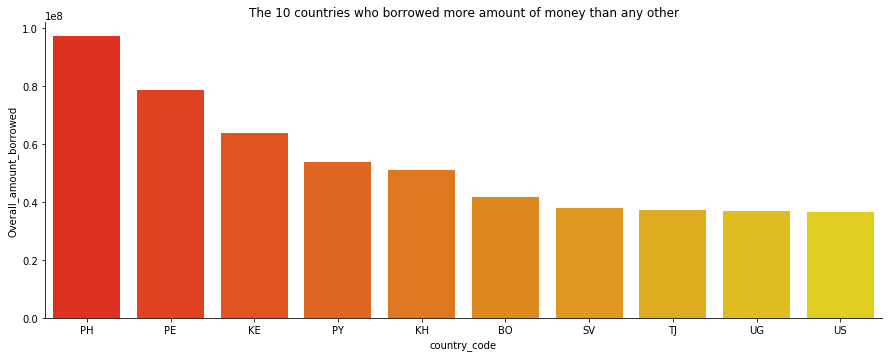

time: 552 ms


In [30]:
sea.catplot('country_code','Overall_amount_borrowed', data=punto5.head(10),kind="bar",aspect=2.5,palette='autumn')
plt.title('The 10 countries who borrowed more amount of money than any other')

Osservazione: comparando i due precedenti barchart, si constata che le nazioni Perù ('PE') e Kenya ('KE') si invertono i ruoli. 
Questo sta a significare che il Perù riceve meno prestiti ma dal volume più ingente a confronto del Kenya che ne riscuote di più ma dall'entità più contenuta.
Grazie alla media si è in grado di dimostrare quanto appena detto:  

In [31]:
print("Mean of Perù is:" , [round(np.mean(loans['funded_amount'][loans['country_code']=='PE']),1)], "Mean of Kenya is:" ,[round(np.mean(loans['funded_amount'][loans['country_code']=='KE']),1)])

Mean of Perù is: [915.1] Mean of Kenya is: [442.9]
time: 523 ms


***

# 6) Like the previous point, but expressed as a percentage of the overall amount lent.

Si calcola la percentuale dei soldi presi in prestito ('funded_amount') fratto i soldi prestati ('loan_amount'), raggruppati per Stato ('country_code').
Quando la percentuale si avvicina a 100, significa che il paese ha preso in prestito tanto quanto ha donato, mentre più ci si allontana dal 100% più i paesi prestano rispetto a quanto prendono in prestito. Non vi è alcun caso in cui la percentuale oltrepassa la soglia del 100%, pertanto nessuna nazione ha preso in prestito più di quanto abbia donato.

In [32]:
punto6=pd.DataFrame({'funded_amount':loans['funded_amount'].groupby(loans['country_code']).sum(),'loan_amount':loans['loan_amount'].groupby(loans['country_code']).sum(),'%_funded-lent':round(((loans['funded_amount'].groupby(loans['country_code']).sum())/(loans['loan_amount'].groupby(loans['country_code']).sum())*100),2)}).reset_index() 
punto6.sort_values('%_funded-lent').head(10) 

,country_code,funded_amount,loan_amount,%_funded-lent
11,BT,15625.0,20000.0,78.12
82,US,36365340.0,46352000.0,78.45
62,PR,362600.0,441900.0,82.05
2,AM,20284675.0,22950475.0,88.38
21,CO,21052825.0,23613975.0,89.15
72,SV,37881675.0,41691550.0,90.86
35,JO,10069400.0,11007450.0,91.48
1,AL,3992475.0,4307350.0,92.69
86,XK,2862325.0,3083025.0,92.84
47,MM,3921325.0,4201550.0,93.33


time: 637 ms


Si è scelto di ordinare dalla percentuale minore alla maggiore, affinchè si individuassero i paesi più 'caritatevoli'.
All'inizio della classifica si trovano: Bhutan (BT), Stati Uniti (US) e Porto Rico (PR) con valori rispettivamente del 78.12%, 87.07% e 88.16%. 
I rimanenti paesi tendono ad appartenere all'intervallo 90-100 %. Inizialmente, per mostrare tutti gli Stati nel grafico, le etichette (tag) si sovrapponevano. Grazie alla rotazione di queste ultime, sono state rese leggibili.

Text(0.5, 1.0, '91 countries with overall amount of money borrowed expressed as % of the overall amount lent')

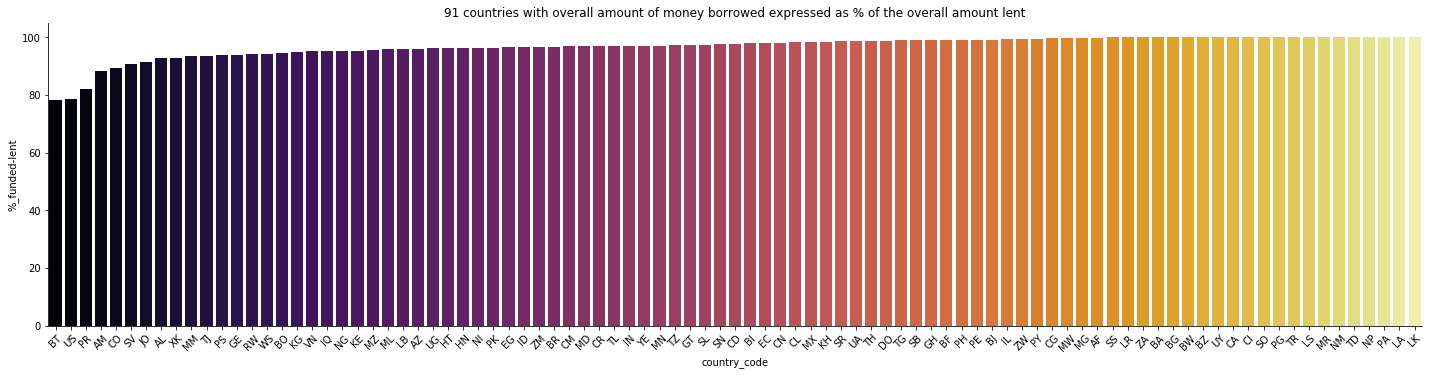

time: 4.09 s


In [33]:
x=sea.catplot('country_code','%_funded-lent', data=punto6.sort_values('%_funded-lent'),kind="bar",aspect=4,palette='inferno')
x.set_xticklabels(rotation=45)  #si ruotano le labels dell'ascissa di 45 gradi
plt.title('91 countries with overall amount of money borrowed expressed as % of the overall amount lent')

***

# 7) Like the three previous points, but split for each year (with respect to disburse time).


Prima di tutto si escludono i missing della colonna 'disburse_time' come forma di pulizia. Questa strategia è efficace perchè il dataset in possesso è molto grande e le righe eliminate sono appena 2809, equivalenti al 2‰. Le righe totali passano da 1419573 a 1416764.

In [34]:
loans=loans[loans['disburse_time'].isnull()==False] 

time: 1.39 s


**7) in riferimento al 4**

Si trasforma la colonna 'disburse_time' in datetime, poi se ne crea una nuova chiamata 'yearD' che coincide con gli anni della variabile 'disburse_time'

In [36]:
loans['disburse_time']= pd.to_datetime(loans['disburse_time'], errors='coerce')
loans['yearD']=pd.DataFrame(loans['disburse_time'].dt.year)              #aggiungo una nuova colonna che rappresenta gli anni di 'disburse_time'

time: 280 ms


Come nella query 4) si esegue il medesimo codice, con l'aggiunta di 'yearD' che partiziona i dati per ogni anno.

In [37]:
Xanno1=pd.DataFrame(loans.groupby(['country_code','yearD'])['yearD'].count()).rename(columns={'yearD':'Borrow_times_Xanno'})
Xanno1.head(13)

Borrow_times_Xanno
country_code yearD                    
AF           2007                  408
             2008                  370
             2009                  678
             2010                  632
             2011                  247
             2015                    1
             2016                    1
AL           2012                  332
             2013                  507
             2014                  603
             2015                  638
             2016                  475
             2017                  520

time: 579 ms


Si crea la funzione TimeSeries, allo scopo di generare serie storiche che mostrino l'andamento temporale della quantità di prestiti ricevuti. I soggetti in questione sono i tre Stati che si sono posizionati in cima alla classifica nel punto 4). L'insieme 'PH','KE' e 'PE' è formato dai paesi con la maggior numerosità di prestiti ricevuti. In primis la TimeSeries legge la tabella e ne sistema gli indici, poi accoda gli Stati messi in input secondo l'ordine della classifica. Dopodichè crea un diagramma ove rappresenta le curve che si riferiscono a tali Stati. Questa funzione è nata per favorire velocità e il riutlizzo.

In [38]:
def TimeSeries(Xanno,variable,a,b,c):
    f=Xanno.reset_index()
    ff=f[f['country_code']==a].append(f[f['country_code']==b]).append(f[f['country_code']==c]) 
    #si crea un dataframe composto dai paesi a,b,c in cima alla classifica
    plt.grid(linestyle=':')              #si crea una griglia tratteggiata
    plt.xlim(2004,2017)                  #si imposta l'estensione dell'asse delle ascisse
    plt.xticks(list(range(2005,2018)))   
    #si considera il range temporale [2005,2017], escludendo l'ultimo anno in quanto inconcluso.
    sea.lineplot(list(ff['yearD']),list(ff[variable]),hue=list(ff['country_code']), data=ff,marker='o') #serie storica 

time: 4.46 ms


Text(0.5, 1.0, 'Time Series of 3 countries (PH, KE, PE) who received more loans than any other')

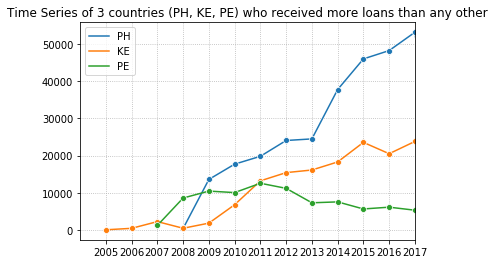

time: 731 ms


In [39]:
TimeSeries(Xanno1,'Borrow_times_Xanno','PH','KE','PE')
plt.title('Time Series of 3 countries (PH, KE, PE) who received more loans than any other')

**7) in riferimento al 5**

In questo esercizio si vuole spiegare il trend annuale in funzione della quantità di soldi presi in prestito, distinto per i primi tre paesi. 
'PH','PE' e 'KE' sono gli oggetti di indagine nel grafico. Nonostante gli Stati di riferimento siano gli stessi, essi vengono immessi nella funzione TimeSeries con lo stesso ordine dell classifica. A scanso di equivoci il grafico evidenzia nettamente il distacco tra le curve.

In [40]:
Xanno2=pd.DataFrame(loans.groupby(['country_code','yearD'])['funded_amount'].sum()) 
Xanno2.head(13)

funded_amount
country_code yearD               
AF           2007        194975.0
             2008        365375.0
             2009        581825.0
             2010        563350.0
             2011        245125.0
             2015          6000.0
             2016          8000.0
AL           2012        411775.0
             2013        780850.0
             2014        875225.0
             2015        808150.0
             2016        579975.0
             2017        536500.0

time: 347 ms


Text(0.5, 1.0, 'Time Series of 3 countries (PH, PE, KE) who borrowed more amount of money than any other')

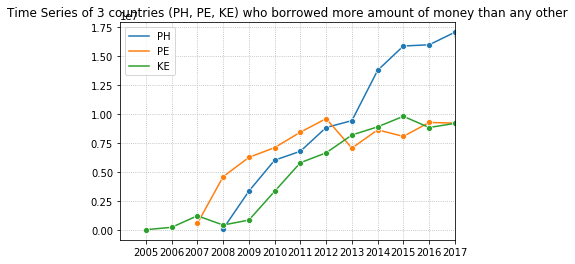

time: 590 ms


In [41]:
TimeSeries(Xanno2,'funded_amount','PH','PE','KE')
plt.title('Time Series of 3 countries (PH, PE, KE) who borrowed more amount of money than any other')

**7) in riferimento al 6**

Si mostrano le percentuali di ogni paese, divise per anno, tra la quantità (funded_amount) presa in prestito e quella prestata (lent_amount).
Non essendo particolarmente utile applicare la funzione TimeSeries in quanto il confronto può essere svolto sia tra Stati con %_funded-lent minimi che massimi
e in molti casi i dati tra gli anni sono assenti, ci si è limitati ad esibire il dataframe richiesto (diviso per anno).

In [42]:
Xanno3=pd.DataFrame((loans.groupby(['country_code','yearD'])['funded_amount'].sum())/(loans['loan_amount'].groupby(loans['country_code']).sum())*100).rename(columns={0:'%_funded-lent_perYear'}) 
Xanno3.head(13)

%_funded-lent_perYear
country_code yearD                       
AF           2007                9.907518
             2008               18.566275
             2009               29.565030
             2010               28.626235
             2011               12.455855
             2015                0.304886
             2016                0.406514
AL           2012                9.559822
             2013               18.128316
             2014               20.319338
             2015               18.762116
             2016               13.464775
             2017               12.455454

time: 648 ms


***

# 8) For each lender, compute the overall amount of money lent. For each loan that has more than one lender, you must assume that all lenders contributed the same amount. 

Originariamente il lavoro svolto per rispondere alla query 8) era legato al 1). La risoluzione consisteva nel richiamare la funzione creata in 1) e applicarla nuovamente, con il supplemento di una colonna contenente per ogni prestito il numero di lenders che hanno partecipato. Non ci si avvale del suddetto procedimento in quanto i tempi di esecuzione sono aggravati dalle numerose operazioni svolte all'interno del ciclo for. Mentre la strategia conseguita, consiste nel fondere le due colonne 'loan_id', 'loan_amount' del dataset 'loans' con il dataset 'lender'. Successivamente, come suggerito in 1), si separano i lenders e si calcolano per ogni prestito i rapporti tra 'loan_amount' e il numero di 'lenders', in modo da assegnare una quota uniforme a ciascun prestatore.
Nonostante lo svolgimento dell'algoritmo impiega poco meno di 1 min per fornire il risultato richiesto, è stato il più efficiente tra i metodi impiegati.

In [51]:
unione=pd.merge(loans[['loan_id','loan_amount']],lender,on='loan_id')  
# Si arricchisce il dataset lender con le colonne 'loan_id' e 'loan_amount' del dataset loans
unione.head(3)

,loan_id,loan_amount,lenders
0,657307,125.0,"spencer5657, matthew8640, larry71496105"
1,657259,400.0,"ltr, andrew5306, dana9865, WHYu, robert9784528..."
2,658010,400.0,"kathy3100, omar7511, amirali5409, bingo, genie..."


time: 1.36 s


In [56]:
diz={}
for ii,i in zip(unione['lenders'],unione['loan_amount']):
    p=ii.split(', ')        # Si divide ogni elemento della colonna 'lenders' in tutti i lender in esso contenente
    fraz=i/len(p)           # Si calcola la frazione tra l'importo del prestito e il numero di prestatori che hanno contribuito
    for el in p:
        if el in diz:       # Se lender è presente in diz
            diz[el]+=fraz   # Si somma la quantità prestata nel dizionario
        else:               # Se lender è assente in diz
            diz[el]=fraz    # Si aggiunge in diz il nuovo lender e la quantità prestata
date=pd.DataFrame({'lenders':list(diz.keys()),'money_lent':list(diz.values())})    #len(date) -->1376228
date.sort_values(by='money_lent',ascending=False).head()

,lenders,money_lent
42,gooddogg1,8.606081e+06
18,trolltech4460,6.068669e+06
16,nms,4.783928e+06
313,jouko1940,4.742672e+06
1042,gmct,4.601058e+06


time: 33.7 s


Si conferma che l'algoritmo ha generato un risultato coerente con quello pronosticato nel momento in cui la somma del denaro prestato da ogni investitore è uguale al totale ammontare di soldi prestati. Il numero di investitori è 1376228 e l'intera somma di denaro prestato è 1156520775.

In [57]:
round(sum(date['money_lent']),2)==sum(unione['loan_amount'])  # 1156520775.0

True

time: 652 ms


Successivamente si presentano tramite barchart i primi 50 Stati in ordine decrescente secondo 'money_lent': il totale monetario di prestiti effettuati per investitore. Secondo questo metodo di calcolo si identifica come contribuente più generoso lo stesso che ha partecipato in maggior misura, ovvero: 'gooddogg1' con oltre 8.5 milioni sborsati.

Text(0.5, 1.0, 'Top 50 lenders by overal amount of money lent')

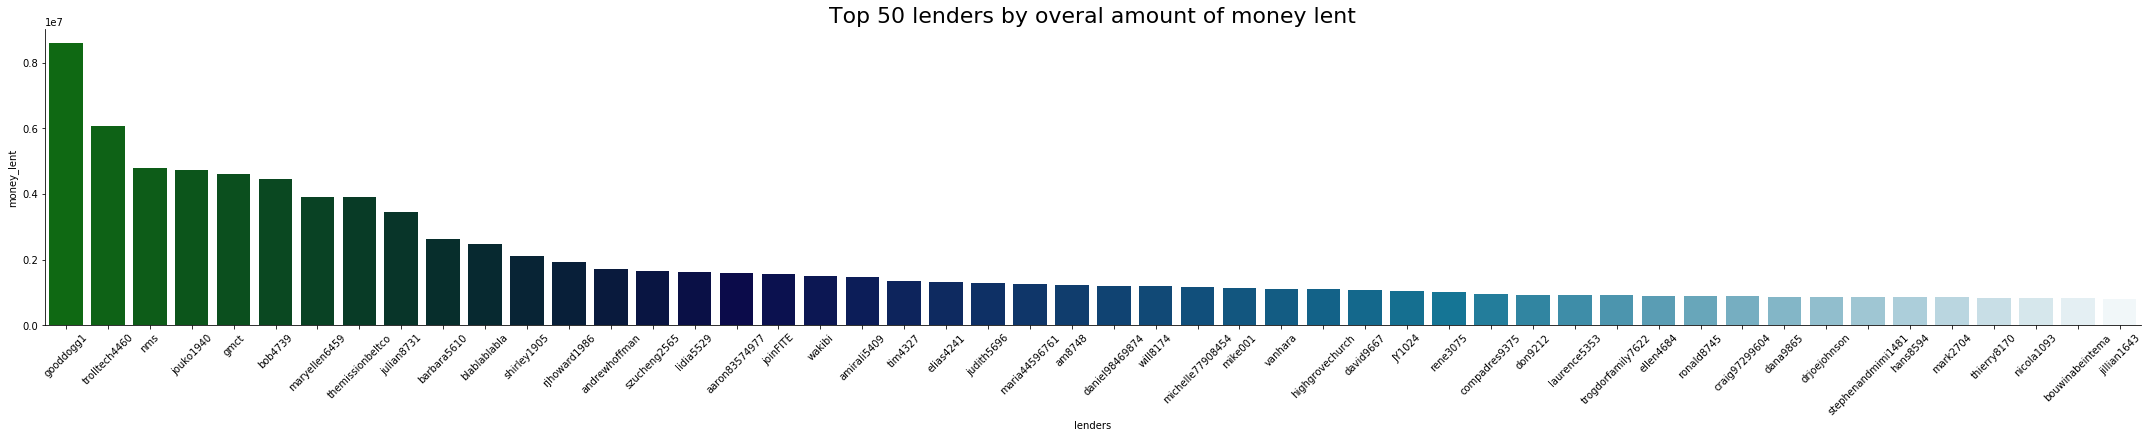

time: 3.07 s


In [58]:
xx=sea.catplot('lenders','money_lent', data=date.sort_values('money_lent',ascending=0).head(50),kind="bar",aspect=6,palette='ocean')
xx.set_xticklabels(rotation=45)
plt.title('Top 50 lenders by overal amount of money lent',fontsize=22)

***

# 9) For each country, compute the difference between the overall amount of money lent and the overall amount of money borrowed. Since the country of the lender is often unknown, you can assume that the true distribution among the countries is the same as the one computed from the rows where the country is known.

A partire dalla prima riga di codice, si aggregano le nazioni sommando singolarmente i versamenti('loan_amount') e singolarmente i prestiti ricevuti('funded_amount').
Si calcola poi 'diff' come differenza tra le variabili 'loan_amount' e 'funded_amount'
Si osservano i dieci paesi che hanno la maggior differenza tra ammontare prestato e preso in prestito nella tabella riassuntiva 'Difference'.
El salvador (SV) risulta essere il contribuente che ha donato più di quanto abbia ricevuto, con differenza pari a 3809875 (quasi 4 milioni). 
D'altro canto 20 Stati su 91 hanno differenza nulla, quindi non hanno 'conti in sospeso'.

In [59]:
Difference=loans.groupby(loans['country_code'])['loan_amount','funded_amount'].sum()
Difference['diff']=Difference['loan_amount']-Difference['funded_amount']
Difference.sort_values(by=['diff'],ascending=False).reset_index().head()

,country_code,loan_amount,funded_amount,diff
0,SV,41691550.0,37881675.0,3809875.0
1,KE,66643300.0,63595300.0,3048000.0
2,AM,22950475.0,20284675.0,2665800.0
3,TJ,39621075.0,37049775.0,2571300.0
4,CO,23613975.0,21052825.0,2561150.0


time: 273 ms


In [60]:
len(Difference[Difference['diff']==0])                 # Quanti Stati hanno differenza pari a 0?

20

time: 3.45 ms


Text(0.5, 1.0, 'Top 50 countries by difference between the overall amount of money lent and that of money borrowed')

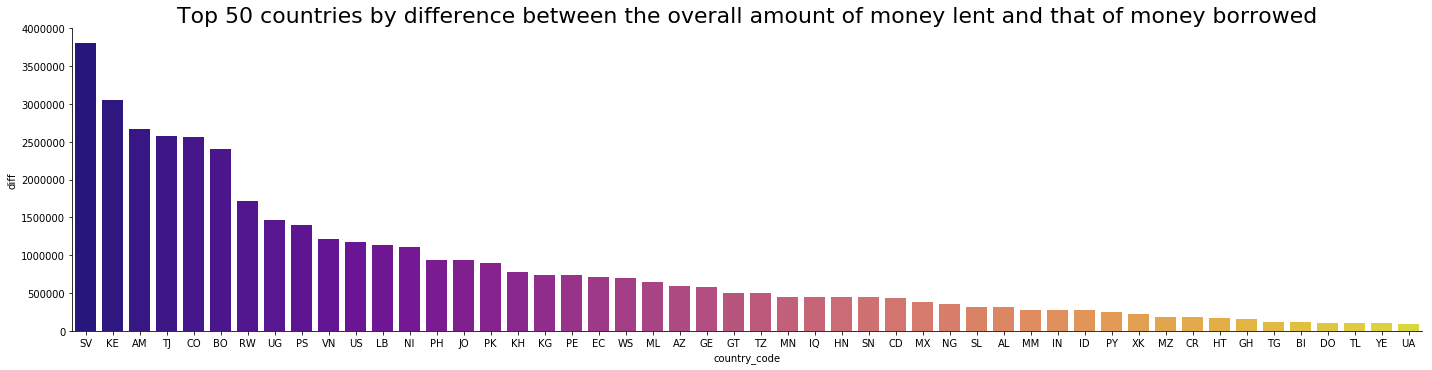

time: 1.79 s


In [61]:
sea.catplot('country_code','diff', data=Difference.sort_values(by=['diff'],ascending=False).reset_index().head(50),kind="bar",aspect=4,palette='plasma')
plt.title('Top 50 countries by difference between the overall amount of money lent and that of money borrowed',fontsize=22)

**Since the country of the lender is often unknown, you can assume that the true distribution among the countries is the same as the one computed from the rows where the country is known.** 

In precedenza sono stati sostituiti i 9 country_code con valore NaN (sconosciuto) corrispondenti alla Namibia con il codice nazionale NM, infatti non risultano essere presenti ulteriori missing: 

In [62]:
#loans['country_name'].isnull().sum()   --> 0 missing
#loans['country_code'].isnull().sum()   --> 0 missing

time: 997 µs


***

# 10) Which country has the highest ratio between the difference computed at the previous point and the population?

Lo scopo di questa richiesta è quella di trovare il paese che fornisca il maggior ammontare di prestito rispetto alla propria popolazione. 
West Samoa(WS) è questo paese e ha un rapporto pari a 3.58099, seguito dalla Armenia(AM) 0.90969 e in 3° posizione El Salvador(SV) 0.59736.
Quindi a livello puramente chiarificatore, ogni cittadino del West Samoa ha mediamente prestato 3.58099 dollari in più di quanti ne abbia presi in prestito. Si integra un ortogramma per avere un diverso approccio visivo e infatti si evince una chiara distinzione tra gli Stati. Già dal secondo posizionamento (AM = Armenia) in poi il 'ratio' scema progressivamente con grande intensità.
Il dataframe finale Fusion contiene le variabili: 'country_code', 'population', 'population_below_poverty_line', 'diff' e 'ratio'.


In [63]:
Fusion=pd.merge(country,Difference,on='country_code')   # Si fonde il dataframe 'Differenza' con il dataset 'country' in relazione alla variabile 'country_code'
Fusion['ratio']=Fusion['diff']/Fusion['population']     # Si aggiunge una nuova colonna ratio che rapporta la differenza con la popolazione di ogni Stato
Fusion=pd.DataFrame({'country_code': Fusion['country_code'],'population':Fusion['population'],'population_below_poverty_line':Fusion['population_below_poverty_line'],'diff':Fusion['diff'],'ratio':Fusion['ratio']}).sort_values(by=['ratio'],ascending=False)
Fusion.head(3)

,country_code,population,population_below_poverty_line,diff,ratio
87,WS,196440,NaN,703450.0,3.580992
71,AM,2930450,32.0,2665800.0,0.909690
57,SV,6377853,34.9,3809875.0,0.597360


time: 39.9 ms


Text(0.5, 1.0, 'Top 50 countries by ratio between difference among money lent and borrowed and the population')

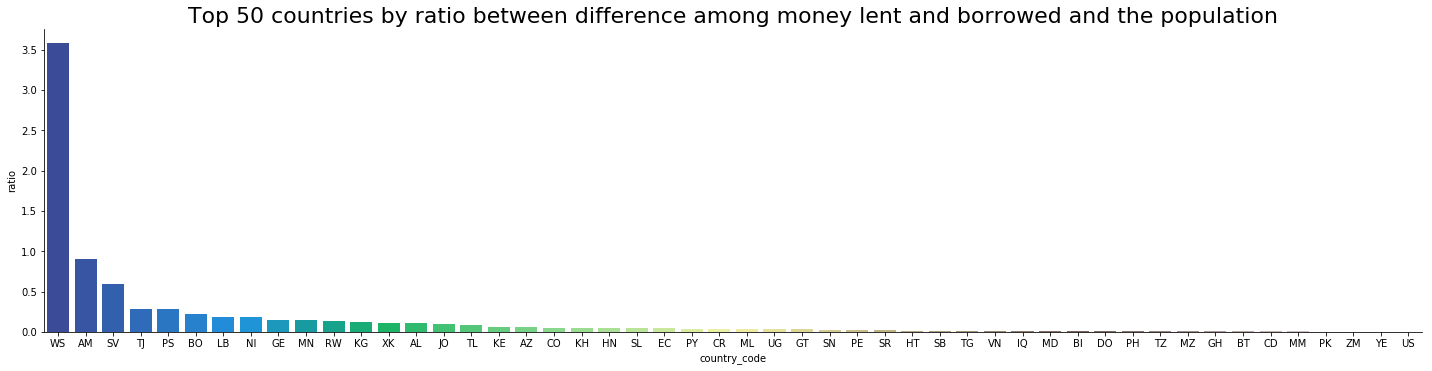

time: 1.72 s


In [64]:
sea.catplot('country_code','ratio', data=Fusion.sort_values('ratio',ascending=0).head(50),kind="bar",aspect=4,palette='terrain')
plt.title('Top 50 countries by ratio between difference among money lent and borrowed and the population',fontsize=22)

***

# 11) Which country has the highest ratio between the difference computed at point 9 and the population that is not below the poverty line?

Si calcola la relazione ('newratio') tra la differenza ('diff') del punto 9 e la popolazione sopra la linea di povertà che si misura nel seguente modo:

(100 - 'population_below_poverty_line')*'population'

L'Armenia (AM) con valore 1.337779 è la nazione con il maggiore 'newratio', quindi mediamente ogni cittadino della fascia non povera presta 1.337779 in più a quanto prende in prestito.

In [65]:
Fusion['newratio']=Fusion['diff']/((100-Fusion['population_below_poverty_line'])*Fusion['population']/100) 
Fusion.sort_values(by=['newratio'],ascending=False).head(1)

,country_code,population,population_below_poverty_line,diff,ratio,newratio
71,AM,2930450,32.0,2665800.0,0.90969,1.337779


time: 21.9 ms


Text(0.5, 1.0, 'Top 50 countries by ratio between difference among money lent and borrowed and the population that is not below the poverty line')

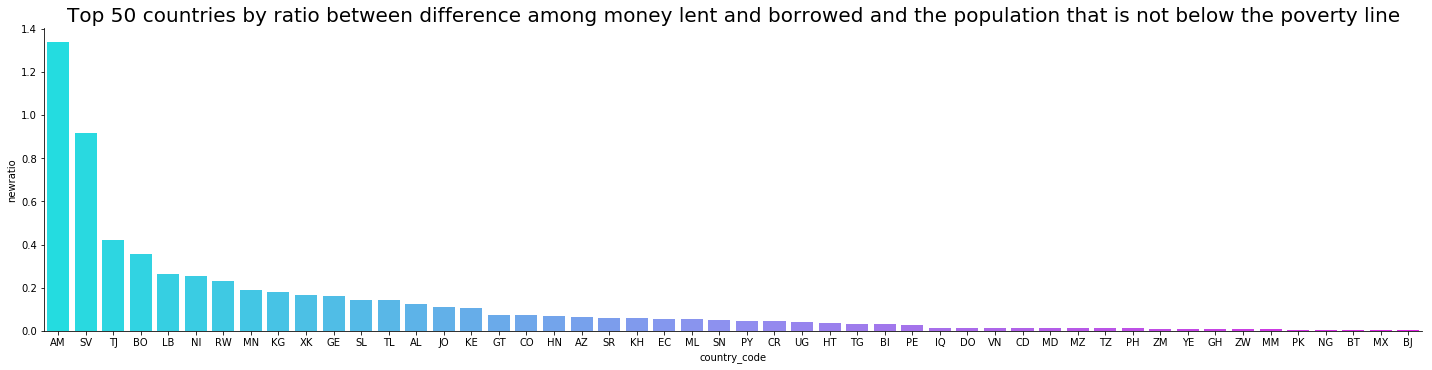

time: 29.9 s


In [66]:
sea.catplot('country_code','newratio', data=Fusion.sort_values(by=['newratio'],ascending=False).head(50),kind="bar",aspect=4,palette='cool')
plt.title('Top 50 countries by ratio between difference among money lent and borrowed and the population that is not below the poverty line',fontsize=20)

***

# 12) For each year, compute the total amount of loans. Each loan that has planned expiration time and disburse time in different years must have its amount distributed proportionally to the number of days in each year. For example, a loan with disburse time December 1st, 2016, planned expiration time January 30th 2018, and amount 5000USD has an amount of 5000USD * 31 / (31+365+30) = 363.85 for 2016, 5000USD * 365 / (31+365+30) = 4284.04 for 2017, and 5000USD * 30 / (31+365+30) = 352.11 for 2018. 

Si necessita di pulire la colonna 'planned_expiration_time' dai valori nulli. Se, al contrario, si sostituissero i missing values con dei valori arbitrari si rischierebbe di compromettere i risultati finali. Infatti il problema principale è che la differenza tra gli anni varia notevolmente in [-140,1670], quindi bisognerebbe considerare anche questo fattore.

Tramite questa operazione di rimozione, le righe passano da 1416764 a 1044940, eliminando 371824 righe. La perdita d'informazione equivale al 26% del dataset 'loans'.

In [68]:
loans=loans[loans['planned_expiration_time'].isnull()==False] 

time: 1.41 s


Si inseriscono nel dataset 'loans' tre variabili aggiuntive, quali:
- 'yearD' --> Anno della data in cui il prestito è avvenuto ('disburse_time').
- 'ydayP' --> Giorno della data di scadenza del prestito ('planned_expiration_time').
- 'ydayD' --> Giorno della data in cui il prestito è avvenuto ('disburse_time').

e si mostrano le prime righe delle variabili a cui verranno poste diverse interrogazioni nelle celle successive.

In [69]:
loans['planned_expiration_time'] = pd.to_datetime(loans['planned_expiration_time'], errors='coerce')
loans['yearP']=pd.DataFrame(loans['planned_expiration_time'].dt.year) 
loans['ydayP']=pd.DataFrame(loans['planned_expiration_time'].dt.day) 
loans['ydayD']=pd.DataFrame(loans['disburse_time'].dt.day) 
loans[['disburse_time','planned_expiration_time','yearP','yearD','ydayP','ydayD','loan_amount']].head(3)

,disburse_time,planned_expiration_time,yearP,yearD,ydayP,ydayD,loan_amount
0,2013-12-22 08:00:00+00:00,2014-02-14 03:30:06+00:00,2014,2013,14,22,125.0
1,2013-12-20 08:00:00+00:00,2014-03-26 22:25:07+00:00,2014,2013,26,20,400.0
2,2014-01-09 08:00:00+00:00,2014-02-15 21:10:05+00:00,2014,2014,15,9,400.0


time: 4.9 s


Si contano le righe ove l'anno ('yearD') in cui è stato effettuato il prestito è maggiore, minore o uguale all'anno ('yearP') di scadenza del prestito (loan), allo scopo di avere un'idea della distribuzione delle osservazioni per generare un'algoritmo efficiente. 

In [70]:
print(len(loans[loans['yearD']<loans['yearP']]), "cases where disburse year comes before planned expiration year")
print(len(loans[loans['yearD']>loans['yearP']]), "cases where disburse year comes after planned expiration year")
print(len(loans[loans['yearD']==loans['yearP']]),"cases where disburse year equals planned expiration year")

150609 cases where disburse year comes before planned expiration year
1546 cases where disburse year comes after planned expiration year
892785 cases where disburse year equals planned expiration year
time: 991 ms


Di queste 892785 righe, 13384 hanno 'duration' negativa e si contraddistinguono per far parte (in aggiunta) dell'insieme di 1546 casi in cui la scadenza è avvenuta prima dell'esborso.

In [71]:
poor=loans[['country_code','country_name','yearD','yearP','duration']][(loans['duration']<0) & (loans['yearD']==loans['yearP'])]
# Si applica una doppia condizione per estrapolare le sole righe che si contraddistinguono per 'duration' negativa e anno di scadenza uguale all'anno del prestito.
len(poor)

13384

time: 88.7 ms


I principali prestiti caratterizzati da 'planned_expiration_time' minore di 'disburse_time' (conclusi dopo la scadenza), hanno luogo in Kenya (36%), in Nigeria (21%) e in Ghana (6%).
La maggior parte delle nazioni in questione è povera oppure è del Terzo Mondo (escludendo gli Stati Uniti), da cui è presumibile che si tenda a prestare soldi solo in caso di disponibilità finanziaria.

In [72]:
mac=poor.append(loans[['country_code','country_name','yearD','yearP','duration']][loans['yearD']>loans['yearP']]) 
mac['country_name'].groupby(mac['country_name']).count().sort_values(ascending=False).head(10) 
# Si contano quanti loans sono stati effettuati per paese

country_name
Kenya            5401
Nigeria          3186
Ghana             851
United States     790
India             385
South Africa      354
Tanzania          318
Peru              255
Zambia            239
Malawi            223
Name: country_name, dtype: int64

time: 114 ms


Dopo la fase esplorativa dei dati, ci si focalizza nel risolvere il nocciolo del problema. 
Si crea una funzione, nominata 'assign', che richiede in input cinque variabili già descritte precedentemente: 'yearP', 'yearD', 'ydayP', 'ydayD' e 'funded'. 
Sono stati scelti identici nomi a quelli già assegnati alle colonne per comodità. La funzione è formata dai seguenti punti:
    
1. si calcola 'diff_anni' in modo da ricavare il numero di anni che intercorre tra 'yearP' e 'yearD'
2. si calcola 'time', che coincide con 'duration', come somma dei giorni (365-'ydayD') che mancano per concludere l'anno di 'disburse_time', dei giorni di 
'planned_expiration_time' e dei 365 giorni per ogni anno (365 * 'diff_anni') presente prima di 'yearD' e dopo 'yearP'. Viene ripetuto il processo perchè non incide particolarmente sul tempo d'esecuzione e genera un valore pronto per l'utilizzo, mentre 'duration' è una series quindi una collezione di dati da cui sarebbe necessario estrarre ogni singolo valore.
3. nel dizionario, originato al di fuori della funzione, si somma all'ammontare associato all'anno 'yearD' la quantità che è stata prestata ('funded' o 'loan_amount')
in proporzione ai giorni rimanenti per concludere l'anno di 'disburse_time' fratto la durata 'time'.
4. nel dizionario si somma all'ammontare associato all'anno 'yearP' la quantità 'loan_amount' fratto la durata 'time'.
5. dopo aver assegnato nei punti 3. e 4. la porzione di denaro degli anni estremi, si considerano gli anni intermedi. 
   Finchè 'diff_anni' è maggiore di 0, itero il procedimento seguente: 
   - nel dizionario si addiziona all'ammontare associato alla differenza tra 'yearP' e 'diff_anni', una porzione di 'loan_amount' pari a (funded * 365 / time)
   - 'diff_anni' diminuisce di un'unità

Dopo aver definito la funzione 'assign', si chiama 'dizio' il dizionario che associa uno zero a tutti gli anni compresi tra il minimo comparso nella variabile 'yearD'(che è notoriamente più piccola di yearP) e il maggiore in 'yearP. Poi si osservano in contemporanea le variabili: 'yearP', 'yearD', 'ydayP', 'ydayD' e 'funded'. 
- Se gli anni ('yearD' e 'yearP') coincidono, allora si aggiunge all'anno 'yearD' l'intero ammontare 'funded'.
- se 'yearD' minore 'yearP', si applica la funzione appena esposta ('assign').
- se 'yearD' maggiore 'yearP', si lancia 'assign' ma invertendo 'yearD' con 'yearP' e 'ydayP' con 'ydayD' perchè, nella stessa maniera, si sono rovesciati i ruoli di 'disburse_time' e 'planned_expiration_time' e quindi bisogna riequilibrare il sistema.

La tabella 'punto12' è formata da due colonne: 
- le chiavi del dizionario corrispondenti agli anni ('Year')
- i valori del dizionario, ossia il valore dei flussi di denaro in proporzione ad ogni anno. Si cambia il formato di questi valori da notazione scientifica (tramite le potenze del 10) a notazione con virgola fissa grazie alla sintassi '{0:f}'. 

In [73]:
def assign(yearP,yearD,ydayP,ydayD,funded):    
        diff_anni=yearP-yearD-1                  
        time=365-ydayD+ydayP+365*(diff_anni)     
        dizio[yearD]+=funded*(365-ydayD)/time    
        dizio[yearP]+=funded*(ydayP)/time        
        while diff_anni >0:                      
            dizio[yearP-diff_anni]+=funded*365/time 
            diff_anni-=1
        
dizio={x:0 for x in range(min(loans['yearD']),max(loans['yearP'])+1)}   #creo un dizionario 
for yearD,yearP,ydayD,ydayP,funded in zip(loans['yearD'],loans['yearP'],loans['ydayD'],loans['ydayP'],loans['loan_amount']):
    if (yearD)==(yearP):
        dizio[yearD]+=funded               
    elif (yearD)<(yearP):
        assign(yearP,yearD,ydayP,ydayD,funded)  
    else:                                       
        assign(yearD,yearP,ydayD,ydayP,funded)
punto12=pd.DataFrame({'Year':list(dizio.keys()),'Tot_Amount':list(["{0:f}".format(x) for x in dizio.values()])},columns=['Year','Tot_Amount'])
punto12

,Year,Tot_Amount
0,2011,2522968.023171
1,2012,118376261.309507
2,2013,131345024.909057
3,2014,152631815.626753
4,2015,156259182.372450
5,2016,161302100.309814
6,2017,165967693.622757
7,2018,1332578.826490


time: 3.1 s


Text(0.5, 1.0, 'Time series of total amount of loans')

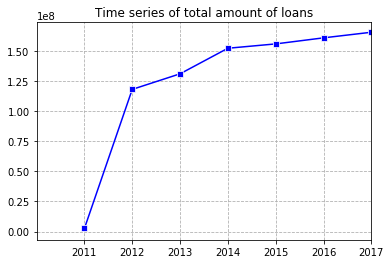

time: 578 ms


In [74]:
plt.grid(linestyle='--')    #si crea una griglia formata all'interno da linee tratteggiate
plt.xlim(2010,2017)         #l'asse delle ascisse comincia dall'anno 2010 e termina all'anno 2017
plt.xticks(list(dizio.keys())[0:7]) #si considera solo la porzione di grafico che parte dal 2010 fino al 2017, escludendo l'anno 2018 inconcluso
sea.lineplot(list(dizio.keys()),list(dizio.values()), data=punto12,color='blue',marker='s') 
#si disegna la serie storica con i dati in 'dizio'
plt.title('Time series of total amount of loans')

Per dimostrare di aver ottenuto risultati coerenti con il dataset iniziale, confronto la somma dei valori del dizionario con la somma dei soldi prestati, memorizzati in 'loan_amount'.

In [75]:
round(sum(dizio.values()),5)==sum(loans['loan_amount'])   
# 889737625: totale dei soldi circolati come prestiti, dal 2011 al 2018.

True

time: 275 ms
